In [30]:
import pandas as pd

# Read the dataset
df = pd.read_csv("../Raw_data/synthetic_house_prices_20_years.csv", index_col="Neighborhood")

In [31]:
df.index.unique()

Index(['Kitsilano', 'Mount Pleasant', 'West End', 'Downtown', 'East Vancouver',
       'Guildford', 'Whalley', 'Fleetwood', 'Cloverdale', 'South Surrey',
       'Metrotown', 'Brentwood', 'Deer Lake', 'Burnaby Heights', 'Edmonds',
       'Steveston', 'Broadmoor', 'Bridgeport', 'Cambie', 'Seafair',
       'Westwood Plateau', 'Burke Mountain', 'Coquitlam Centre',
       'Maillardville', 'Ladner', 'North Delta', 'Tsawwassen', 'Uptown',
       'Queensborough', 'Glenbrook North', 'Mary Hill', 'Glenwood',
       'Riverwood', 'Central Port Coquitlam', 'Upper Lonsdale',
       'Lower Lonsdale', 'Lynn Valley', 'Central Lonsdale', 'Ambleside',
       'Dundarave', 'Horseshoe Bay', 'British Properties', 'Caulfeild'],
      dtype='object', name='Neighborhood')

In [ ]:
# Define mapping of neighborhoods to major cities in Metro Vancouver
neighborhood_to_city = {
    "Vancouver": ["Kitsilano", "Mount Pleasant", "West End", "Downtown", "East Vancouver", "Cambie"],
    "Surrey": ["Guildford", "Whalley", "Fleetwood", "Cloverdale", "South Surrey"],
    "Burnaby": ["Metrotown", "Brentwood", "Deer Lake", "Burnaby Heights", "Edmonds"],
    "Richmond": ["Steveston", "Broadmoor", "Bridgeport", "Cambie", "Seafair"],
    "Coquitlam": ["Westwood Plateau", "Burke Mountain", "Coquitlam Centre", "Maillardville"],
    "Delta": ["Ladner", "North Delta", "Tsawwassen"],
    "New Westminster": ["Uptown", "Queensborough", "Glenbrook North"],
    "Port Coquitlam": ["Mary Hill", "Glenwood", "Riverwood", "Central Port Coquitlam"],
    "North Vancouver": ["Upper Lonsdale", "Lower Lonsdale", "Lynn Valley", "Central Lonsdale"],
    "West Vancouver": ["Ambleside", "Dundarave", "Horseshoe Bay", "British Properties", "Caulfeild"]
}

# Reverse the mapping for lookup
neighborhood_to_city_map = {neigh: city for city, neighborhoods in neighborhood_to_city.items() for neigh in neighborhoods}

# Map neighborhoods to cities
df["City"] = df.index.map(neighborhood_to_city_map)

# Handle any neighborhoods not mapped
df["City"].fillna("Other", inplace=True)

# Keep only selected columns
df = df[["City", "Year", "Legal Units", "Market Price", "Square Footage (Land)"]]



Processed dataset saved as processed_house_prices.csv


In [38]:
# Aggregate data: Group by Year and compute average Market Price and total Legal Units
df_grouped = df.groupby("Year").agg({
    "Market Price": "mean",  # Average market price per year
    "Legal Units": "mean",  # Total legal units per year
    "Square Footage (Land)": "mean"  # Average land square footage per year
}).reset_index()

# Save the aggregated dataset
aggregated_file_path = "aggregated_house_prices.csv"
df_grouped.to_csv(aggregated_file_path, index=False)

print(f"Aggregated dataset saved as {aggregated_file_path}")


Aggregated dataset saved as aggregated_house_prices.csv


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

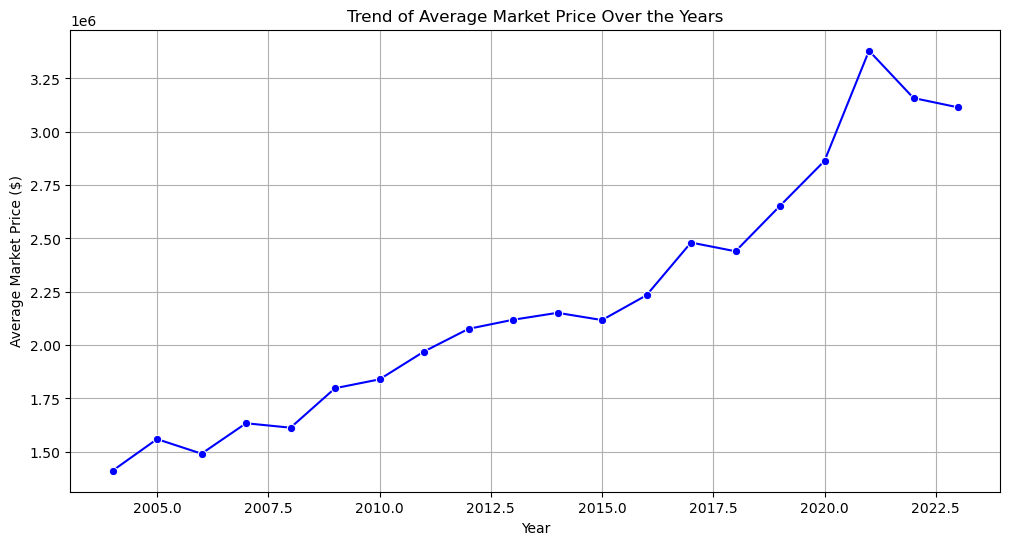

In [40]:
# Create a line chart for Market Price trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_grouped["Year"], y=df_grouped["Market Price"], marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Average Market Price ($)")
plt.title("Trend of Average Market Price Over the Years")
plt.grid(True)
plt.show()

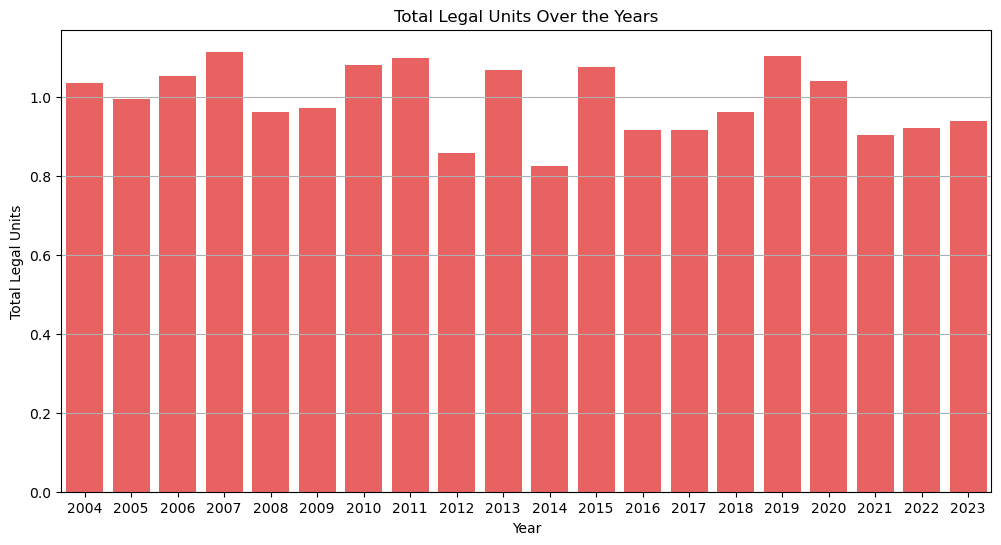

In [41]:
# Create a bar chart for Total Legal Units per year
plt.figure(figsize=(12, 6))
sns.barplot(x=df_grouped["Year"], y=df_grouped["Legal Units"], color="red", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Total Legal Units")
plt.title("Total Legal Units Over the Years")
plt.grid(axis="y")
plt.show()